# Unit 4 - Mini Project

## You will be working on a machine learning project using data from the UCI Machine Learning Repository.
The dataset is located at:
 https://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008 (google UCI Diabetes dataset)
Diabetes 130-US hospitals for years 1999-2008 Data Set 

Data Set Information:

The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. 
* It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.
* It is an inpatient encounter (a hospital admission).
* It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.
* The length of stay was at least 1 day and at most 14 days.
* Laboratory tests were performed during the encounter.
* Medications were administered during the encounter.

The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.



### Your goal is to make a classification model that can be used to predict something within the dataset.

For example:
* you can choose to predict whether a patient is likely to be a readmit in the hospital within 30days.
* You can choose which features to use in your model (race, gender, age, etc.) and train your model.
* Your project should include a description of what you’re trying to accomplish, EDA, data wrangling, model creation, model evaluations, and model selections. 
* Your analytics should include at least 2 different types of models (i.e. Logistic, KNN and Random Forest).


# Environment set up

In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Data Collection

In [ ]:
patient_data_df = pd.read_csv('https://raw.githubusercontent.com/niteen11/cuny_lagcc_micro_credential_data_analytics/main/Track%20A/Unit%204%20-%20Machine%20Learning%20and%20Modeling%20Techniques/Dataset/diabetic_data.csv')

In [251]:
patient_data_df.head(100)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1195056,79549353,Caucasian,Male,[70-80),?,2,1,2,1,?,?,19,2,8,0,0,0,996,413,414,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
96,1195548,106343838,Caucasian,Female,[70-80),?,1,3,7,5,?,Family/GeneralPractice,64,0,21,0,0,1,38,428,427,8,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
97,1212006,84981816,Caucasian,Male,[70-80),?,1,1,7,3,?,?,55,4,23,0,0,1,414,411,511,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
98,1257282,84488562,Other,Female,[50-60),?,1,1,7,2,?,Surgery-General,53,0,6,0,0,0,590,250.01,401,3,None,>8,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


In [ ]:
patient_data_df.shape

(101766, 50)

In [ ]:
patient_data_df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

Some data computation examples...

In [ ]:
patient_data_df[patient_data_df['race']=='AfricanAmerican'].shape[0] * 100 / patient_data_df.shape[0]

18.876638562977814

In [ ]:
patient_data_df[patient_data_df['race']=='Hispanic'].shape[0] * 100 / patient_data_df.shape[0]

2.001650846058605

In [ ]:
patient_data_df[patient_data_df['race']=='Asian'].shape[0] * 100 / patient_data_df.shape[0]

0.6298763830748974

In [ ]:
patient_data_df[patient_data_df['race']=='Hispanic'].shape[0] * 100 / patient_data_df.shape[0]

2.001650846058605

In [ ]:
patient_data_df[patient_data_df['race']=='Other'].shape[0] * 100 / patient_data_df.shape[0]

1.4798655739637994

# EDA (Exploratory Data Analysis

In [ ]:
# AGE vs Gender
# Gender Vs Race
# Race vs Age
# time in hospital Vs 'num_lab_procedures', 'num_procedures', 'num_medications'
# More plots and graphs....

<Figure size 2160x576 with 0 Axes>

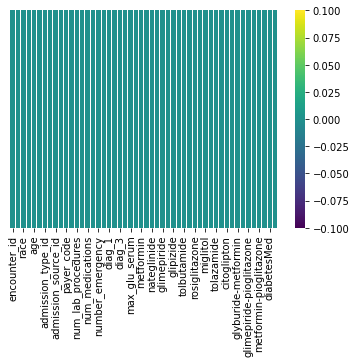

<Figure size 2160x576 with 0 Axes>

In [ ]:
sns.heatmap(patient_data_df.isnull(),yticklabels=False, cmap= 'viridis')
plt.figure(figsize=(30,8))

##DATA MUNGING

In [ ]:
gender_race = patient_data_df[['race', 'gender', 'readmitted']].where(gender_race['readmitted']!='NO')
gender_race.head(20)

,race,gender,readmitted
0,NaN,NaN,NaN
1,Caucasian,Female,>30
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,Caucasian,Male,>30
6,NaN,NaN,NaN
7,Caucasian,Male,>30
8,NaN,NaN,NaN
9,NaN,NaN,NaN


gender_race.groupby(['race'])['readmitted!+'].count()

In [ ]:
gender_race.dropna()

,race,gender,readmitted
1,Caucasian,Female,>30
5,Caucasian,Male,>30
7,Caucasian,Male,>30
10,AfricanAmerican,Female,>30
11,AfricanAmerican,Male,<30
...,...,...,...
101754,Caucasian,Female,>30
101755,Other,Female,>30
101756,Other,Female,>30
101760,AfricanAmerican,Female,>30


DATA ANALYSIS OF GENDER VS. RACE

In [ ]:
total_readmit = gender_race['race'].count()

In [ ]:
total_readmit

46902

In [ ]:
gender_race.groupby(['gender'])['readmitted'].count()

gender
Female    25670
Male      21232
Name: readmitted, dtype: int64

In [ ]:
gender_race.groupby(['race'])['readmitted'].count()

race
?                    726
AfricanAmerican     8789
Asian                226
Caucasian          35716
Hispanic             854
Other                591
Name: readmitted, dtype: int64

In [166]:
race_count = gender_race.groupby(['race'])['readmitted'].count()

In [ ]:
unknown_race = gender_race.query('race == "?"')['readmitted'].count()
Af_Am_race = gender_race.query('race == "AfricanAmerican"')['readmitted'].count()
Asian_race = gender_race.query('race == "Asian"')['readmitted'].count()
Cau_race = gender_race.query('race == "Caucasian"')['readmitted'].count()
His_race = gender_race.query('race == "Hispanic"')['readmitted'].count()
Other_race = gender_race.query('race == "Other"')['readmitted'].count()

In [138]:
unknown_ratio = round(unknown_race/total_readmit,3)
Af_Am_race_ratio = round(Af_Am_race/total_readmit,3)
Asian_race_ratio = round(Asian_race/total_readmit,3)
Cau_race_ratio = round(Cau_race/total_readmit,3)
His_race_ratio = round(His_race/total_readmit,3)
Other_race_ratio = round(Other_race/total_readmit,3)

In [132]:
print('People who are indentifed as {0} were readmitted at a {1}% rate where they are {2} cases out of {3}'.format('Unknown',unknown_ratio *100, unknown_race, total_readmit))

The ratio of people who are indentifed as Unknown were readmitted at a 1.5% rate where they are 726 cases out of 46902


In [134]:
print('People who are indentifed as {0} were readmitted at a {1}% rate where they are {2} cases out of {3}'.format('African American',Af_Am_race_ratio *100,Af_Am_race, total_readmit))

People who are indentifed as African American were readmitted at a 18.7% rate where they are 8789 cases out of 46902


In [135]:
print('People who are indentifed as {0} were readmitted at a {1}% rate where they are {2} cases out of {3}'.format('Asian',Asian_race_ratio *100,Asi_Race, total_readmit))

People who are indentifed as Asian were readmitted at a 0.5% rate where they are 641 cases out of 46902


In [136]:
print('People who are indentifed as {0} were readmitted at a {1}% rate where they are {2} cases out of {3}'.format('Caucasian',Cau_race_ratio *100,Cau_race, total_readmit))

People who are indentifed as Caucasian were readmitted at a 76.2% rate where they are 35716 cases out of 46902


In [140]:
print('People who are indentifed as {0} were readmitted at a {1}% rate where they are {2} cases out of {3}'.format('Hispanic',round(His_race_ratio *100,2),His_race, total_readmit))

People who are indentifed as Hispanic were readmitted at a 1.8% rate where they are 854 cases out of 46902


In [141]:
print('People who are indentifed as {0} were readmitted at a {1}% rate where they are {2} cases out of {3}'.format('Other',Other_race_ratio *100,Other_race, total_readmit))

People who are indentifed as Other were readmitted at a 1.3% rate where they are 591 cases out of 46902


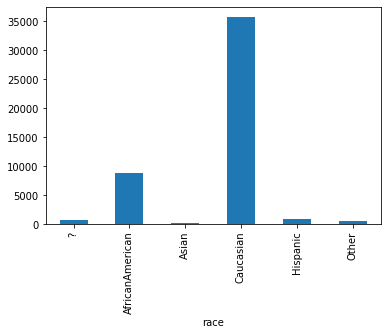

In [167]:
race_count.plot.bar()

In [ ]:
race_age = patient_data_df[['race', 'age', 'readmitted']].where(race_age['readmitted']!='NO')
race_age

,race,age,readmitted
0,NaN,NaN,NaN
1,Caucasian,[10-20),>30
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
101761,AfricanAmerican,[70-80),>30
101762,NaN,NaN,NaN
101763,NaN,NaN,NaN
101764,NaN,NaN,NaN


In [142]:
race_age.dropna()

,race,age,readmitted
1,Caucasian,[10-20),>30
5,Caucasian,[50-60),>30
7,Caucasian,[70-80),>30
10,AfricanAmerican,[40-50),>30
11,AfricanAmerican,[60-70),<30
...,...,...,...
101754,Caucasian,[70-80),>30
101755,Other,[40-50),>30
101756,Other,[60-70),>30
101760,AfricanAmerican,[60-70),>30


In [143]:
race_age.groupby('race')['readmitted'].count()

race
?                    726
AfricanAmerican     8789
Asian                226
Caucasian          35716
Hispanic             854
Other                591
Name: readmitted, dtype: int64

In [156]:
age_count =race_age.groupby('age')['readmitted'].count()

<Figure size 2160x576 with 0 Axes>

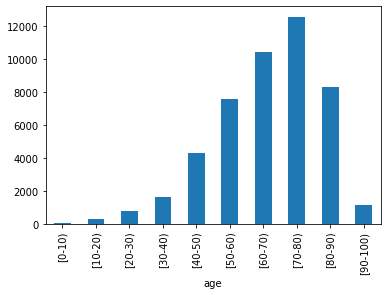

<Figure size 2160x576 with 0 Axes>

In [164]:
age_count.plot.bar()
plt.figure(figsize=(30,8))

In [201]:
Time_in_Hosp_vs_lab_procedures = patient_data_df[['race','time_in_hospital', 'num_lab_procedures']]

In [202]:
Time_in_Hosp_vs_lab_procedures.head(10)

,race,time_in_hospital,num_lab_procedures
0,Caucasian,1,41
1,Caucasian,3,59
2,AfricanAmerican,2,11
3,Caucasian,2,44
4,Caucasian,1,51
5,Caucasian,3,31
6,Caucasian,4,70
7,Caucasian,5,73
8,Caucasian,13,68
9,Caucasian,12,33


In [179]:
Time_in_Hosp_vs_lab_procedures.count()

race                  101766
time_in_hospital      101766
num_lab_procedures    101766
dtype: int64

In [180]:
Time_in_Hosp_vs_lab_procedures.dropna()

,race,time_in_hospital,num_lab_procedures
0,Caucasian,1,41
1,Caucasian,3,59
2,AfricanAmerican,2,11
3,Caucasian,2,44
4,Caucasian,1,51
...,...,...,...
101761,AfricanAmerican,3,51
101762,AfricanAmerican,5,33
101763,Caucasian,1,53
101764,Caucasian,10,45


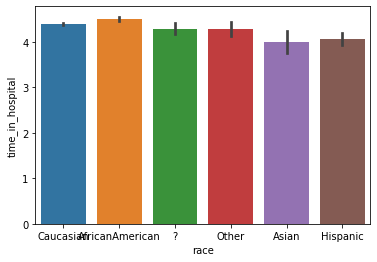

<Figure size 36000x7200 with 0 Axes>

In [196]:
sns.barplot(x='race', y='time_in_hospital', data=Time_in_Hosp_vs_lab_procedures)
plt.figure(figsize=(500, 100))
plt.show()

In [252]:
patient_data_df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [200]:
Time_in_Hosp_vs_num_procedures = patient_data_df[['race','time_in_hospital', 'num_procedures']]

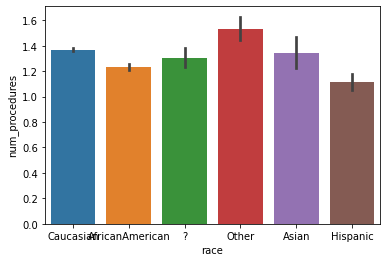

In [205]:
sns.barplot(x='race', y='num_procedures', data=Time_in_Hosp_vs_num_procedures)

In [210]:
Time_Hosp_vs_Num_Meds = patient_data_df[['race', 'time_in_hospital', 'num_medications']]

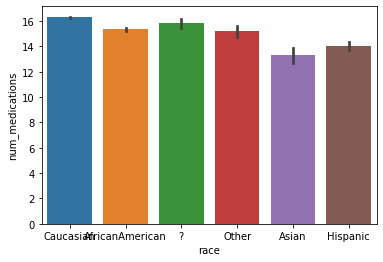

In [211]:
sns.barplot(x='race', y='num_medications', data=Time_Hosp_vs_Num_Meds)

# Data Pre Processing

In [ ]:
import numpy as np

In [ ]:
patient_data_df_01 = patient_data_df.copy()
patient_data_df_clean = patient_data_df_01.replace('?',np.NaN)
patient_data_missing_values = patient_data_df_clean.isnull().sum()
patient_data_missing_values

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [212]:
type(patient_data_df_clean)

pandas.core.frame.DataFrame

In [213]:
patient_data_df_clean.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [214]:
patient_data_df_clean[patient_data_df_clean['weight'].isnull()].shape[0] * 100 / patient_data_df_clean.shape[0]

96.85847925633315

In [215]:
patient_data_df_clean[patient_data_df_clean['medical_specialty'].isnull()].shape[0] * 100 / patient_data_df_clean.shape[0]

49.08220820313268

In [216]:
patient_data_df_clean[patient_data_df_clean['race'].isnull()].shape[0] * 100 / patient_data_df_clean.shape[0]

2.2335554114340743

In [217]:
patient_data_df_clean[patient_data_df_clean['payer_code'].isnull()].shape[0] * 100 / patient_data_df_clean.shape[0]

39.5574160328597

In [218]:
patient_data_df_clean[patient_data_df_clean['diag_1'].isnull()].shape[0] * 100 / patient_data_df_clean.shape[0]

0.020635575732562937

In [219]:
patient_data_df_clean[patient_data_df_clean['diag_2'].isnull()].shape[0] * 100 / patient_data_df_clean.shape[0]

0.3517874339170253

In [ ]:

patient_data_df_clean[patient_data_df_clean['diag_3'].isnull()].shape[0] * 100 / patient_data_df_clean.shape[0]

In [221]:
#let's drop other 
patient_df_ml_prep_01= patient_data_df_clean.drop(['weight','payer_code','medical_specialty'],axis=1)

In [222]:
patient_df_ml_prep_01.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [223]:
patient_df_ml_prep_01['30DayReadmit'] = np.where(patient_df_ml_prep_01['readmitted'] == 'NO', 0, 1)

In [224]:
patient_df_ml_prep_01.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,30DayReadmit
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,0
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,1
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,0


In [225]:
patient_df_ml_prep_01 = patient_df_ml_prep_01[((patient_df_ml_prep_01.discharge_disposition_id != 11) & 
                                          (patient_df_ml_prep_01.discharge_disposition_id != 13) &
                                          (patient_df_ml_prep_01.discharge_disposition_id != 14) & 
                                          (patient_df_ml_prep_01.discharge_disposition_id != 19) & 
                                          (patient_df_ml_prep_01.discharge_disposition_id != 20) & 
                                          (patient_df_ml_prep_01.discharge_disposition_id != 21))]

In [226]:
patient_df_ml_prep_01.shape

(99343, 48)

In [227]:
from sklearn.preprocessing import StandardScaler

In [228]:
# Cleaning the data, replacing the null values in numeric data by 0 and object data by unknown,
numcolumn = patient_df_ml_prep_01.select_dtypes(include = [np.number]).columns
objcolumn = patient_df_ml_prep_01.select_dtypes(include = ['object']).columns


# Substituting 0 and unknown,

patient_df_ml_prep_01[numcolumn] = patient_df_ml_prep_01[numcolumn].fillna(0)
patient_df_ml_prep_01[objcolumn] = patient_df_ml_prep_01[objcolumn].fillna("unknown")

In [229]:
patient_df_ml_prep_01.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,30DayReadmit
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,unknown,unknown,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,0
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,1
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,0


Going beyond....Taking extra steps to encode data....

In [230]:
#Encoding the data,

def map_now():
    listname = [('infections', 139),
                ('neoplasms', (239 - 139)),
                ('endocrine', (279 - 239)),
                ('blood', (289 - 279)),
                ('mental', (319 - 289)),
                ('nervous', (359 - 319)),
                ('sense', (389 - 359)),
                ('circulatory', (459-389)),
                ('respiratory', (519-459)),
                ('digestive', (579 - 519)),
                ('genitourinary', (629 - 579)),
                ('pregnancy', (679 - 629)),
                ('skin', (709 - 679)),
                ('musculoskeletal', (739 - 709)),
                ('congenital', (759 - 739)),
                ('perinatal', (779 - 759)),
                ('ill-defined', (799 - 779)),
                ('injury', (999 - 799))]
    
    
    dictcout = {}
    count = 1
    for name, num in listname:
        for i in range(num):
            dictcout.update({str(count): name})  
            count += 1
    return dictcout
  

def codemap(df, codes):
    import pandas as pd
    namecol = df.columns.tolist()
    for col in namecol:
        temp = [] 
        for num in df[col]:           
            if ((num is None) | (num in ['unknown', '?']) | (pd.isnull(num))): temp.append('unknown')
            elif(num.upper()[0] == 'V'): temp.append('supplemental')
            elif(num.upper()[0] == 'E'): temp.append('injury')
            else: 
                lkup = num.split('.')[0]
                temp.append(codes[lkup])           
        df.loc[:, col] = temp               
    return df 


listcol = ['diag_1', 'diag_2', 'diag_3']
codes = map_now()
patient_df_ml_prep_01[listcol] = codemap(patient_df_ml_prep_01[listcol], codes)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [231]:
patient_df_ml_prep_01.describe

<bound method NDFrame.describe of         encounter_id  patient_nbr  ... readmitted 30DayReadmit
0            2278392      8222157  ...         NO            0
1             149190     55629189  ...        >30            1
2              64410     86047875  ...         NO            0
3             500364     82442376  ...         NO            0
4              16680     42519267  ...         NO            0
...              ...          ...  ...        ...          ...
101761     443847548    100162476  ...        >30            1
101762     443847782     74694222  ...         NO            0
101763     443854148     41088789  ...         NO            0
101764     443857166     31693671  ...         NO            0
101765     443867222    175429310  ...         NO            0

[99343 rows x 48 columns]>

In [232]:
patient_df_ml_prep_02 = patient_df_ml_prep_01.drop(['encounter_id', "patient_nbr", 'admission_type_id','readmitted'], axis =1)

In [234]:
patient_df_ml_prep_02.head()

,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,30DayReadmit
0,Caucasian,Female,[0-10),25,1,1,41,0,1,0,0,0,endocrine,unknown,unknown,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0
1,Caucasian,Female,[10-20),1,7,3,59,0,18,0,0,0,endocrine,endocrine,endocrine,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,1
2,AfricanAmerican,Female,[20-30),1,7,2,11,5,13,2,0,1,pregnancy,endocrine,supplemental,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0
3,Caucasian,Male,[30-40),1,7,2,44,1,16,0,0,0,infections,endocrine,circulatory,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0
4,Caucasian,Male,[40-50),1,7,1,51,0,8,0,0,0,neoplasms,neoplasms,endocrine,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0


In [235]:

#Normalization of the data,

listnormal = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                     'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

normal = StandardScaler()

patient_df_ml_prep_02[listnormal] = normal.fit_transform(patient_df_ml_prep_02[listnormal])

patient_df_ml_prep_02.describe()

,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,30DayReadmit
count,99343.000000,99343.000000,9.934300e+04,9.934300e+04,9.934300e+04,9.934300e+04,9.934300e+04,9.934300e+04,9.934300e+04,9.934300e+04,99343.000000
mean,3.517882,5.731083,1.874346e-14,-3.424256e-15,3.449070e-15,-1.776343e-15,1.182191e-13,6.322393e-14,-1.499301e-15,-9.426101e-14,0.471256
std,5.184359,4.065029,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,0.499176
min,1.000000,1.000000,-1.138438e+00,-2.137026e+00,-7.835647e-01,-1.850439e+00,-2.918627e-01,-2.116216e-01,-5.005746e-01,-3.298145e+00,0.000000
25%,1.000000,1.000000,-8.015554e-01,-6.071886e-01,-7.835647e-01,-7.386238e-01,-2.918627e-01,-2.116216e-01,-5.005746e-01,-7.221572e-01,0.000000
50%,1.000000,7.000000,-1.277904e-01,5.574070e-02,-1.962887e-01,-1.209485e-01,-2.918627e-01,-2.116216e-01,-5.005746e-01,3.082380e-01,0.000000
75%,3.000000,7.000000,5.459746e-01,7.186700e-01,3.909872e-01,4.967267e-01,-2.918627e-01,-2.116216e-01,2.928105e-01,8.234355e-01,1.000000
max,28.000000,25.000000,3.241035e+00,4.543262e+00,2.740091e+00,8.032365e+00,3.290615e+01,8.083523e+01,1.616051e+01,4.429819e+00,1.000000


In [236]:
#Let's store readmitted in y and rest of the columns in X,

Y = patient_df_ml_prep_02['30DayReadmit']
X = patient_df_ml_prep_02.drop(['30DayReadmit'], axis =1)
X = pd.get_dummies(X)

In [237]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = .2, 
                                                random_state = 7, stratify = Y)

In [238]:
print("shape of Xtrain,Xtest:",Xtrain.shape,Xtest.shape)

shape of Xtrain,Xtest: (79474, 169) (19869, 169)


# Logistic Regression

In [239]:
# create model logistic as logistic regression using Sklearn 
from sklearn.linear_model import LogisticRegression
logisticreg = LogisticRegression(tol=1e-7, penalty='l2', C=0.0005)
logisticreg.fit(Xtrain, Ytrain)
Ylog = logisticreg.predict(Xtest)

In [240]:
# Checking the accuracy of the model 
print(" The accuracy of the Logistic regression model:" ,logisticreg.score(Xtest, Ytest))

 The accuracy of the Logistic regression model: 0.6276611807338064


In [241]:
# checking the confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Ytest, Ylog))

[[8379 2127]
 [5271 4092]]


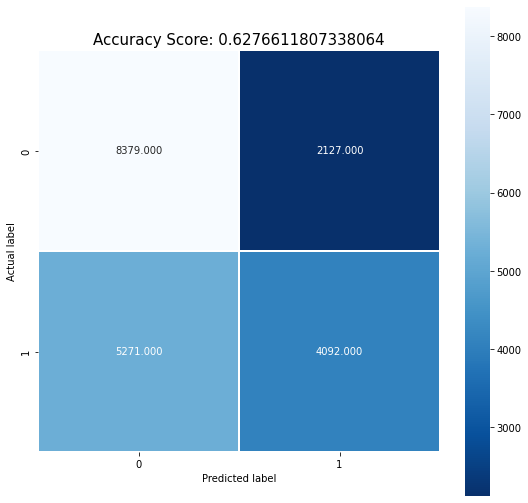

In [242]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Ytest, Ylog), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(logisticreg.score(Xtest, Ytest))
plt.title(all_sample_title, size = 15);

In [243]:
# Checking the summary of classification
from sklearn.metrics import classification_report
print(classification_report(Ytest, Ylog, target_names = ['NO', 'YES']))

              precision    recall  f1-score   support

          NO       0.61      0.80      0.69     10506
         YES       0.66      0.44      0.53      9363

    accuracy                           0.63     19869
   macro avg       0.64      0.62      0.61     19869
weighted avg       0.63      0.63      0.61     19869



In [244]:
# Checking the performance of model using ROC curve plots
YScre = logisticreg.decision_function(Xtest)

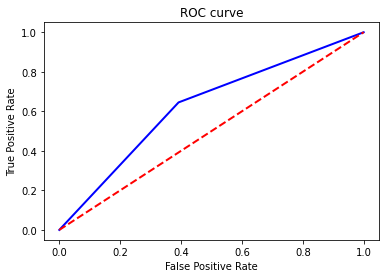

In [245]:
##Computing false and true positive rates
from sklearn.metrics import roc_curve

fpr, tpr,_=roc_curve(logisticreg.predict(Xtrain),Ytrain,drop_intermediate=False)

import matplotlib.pyplot as plt
plt.figure()
##Creating the ROC,
plt.plot(fpr, tpr, color='blue',
 lw=2, label='ROC curve')
##Finding FPR and TPR,
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
##Splecifying the label and title,
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [246]:
from sklearn import metrics

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


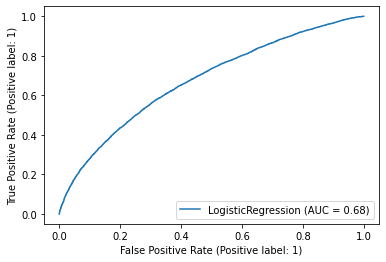

In [247]:
metrics.plot_roc_curve(logisticreg, Xtest, Ytest)  

# Random Forest

In [249]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42,n_estimators=500)
random_forest.fit(Xtrain, Ytrain)
Yrandforest = random_forest.predict(Xtest)

In [ ]:
#Calculating the score,
scorey =random_forest.predict_proba(Xtest)[:,1]
rfpr, rtpr, thresholds = roc_curve(Ytest, scorey)

In [ ]:
#Checking the accuracy,

print(" Accuracy of Randomeforest classification: ", random_forest.score(Xtest, Ytest))

 Accuracy of Randomeforest classification:  0.6374251346318386


In [ ]:
#Printing the confusion matrix,
print(confusion_matrix(Ytest, Yrandforest))

[[7558 2948]
 [4256 5107]]


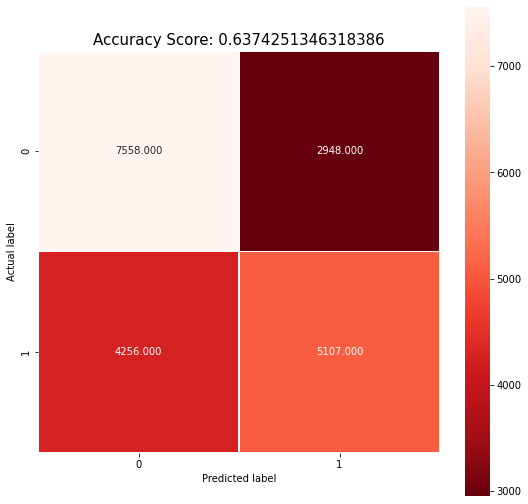

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Ytest, Yrandforest), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(random_forest.score(Xtest, Ytest))
plt.title(all_sample_title, size = 15);

In [ ]:
print(classification_report(Ytest, Yrandforest, target_names = ['NO', 'YES']))

              precision    recall  f1-score   support

          NO       0.64      0.72      0.68     10506
         YES       0.63      0.55      0.59      9363

    accuracy                           0.64     19869
   macro avg       0.64      0.63      0.63     19869
weighted avg       0.64      0.64      0.63     19869



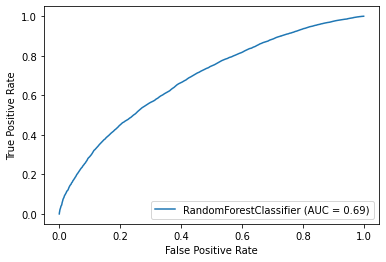

In [ ]:
metrics.plot_roc_curve(random_forest, Xtest, Ytest)

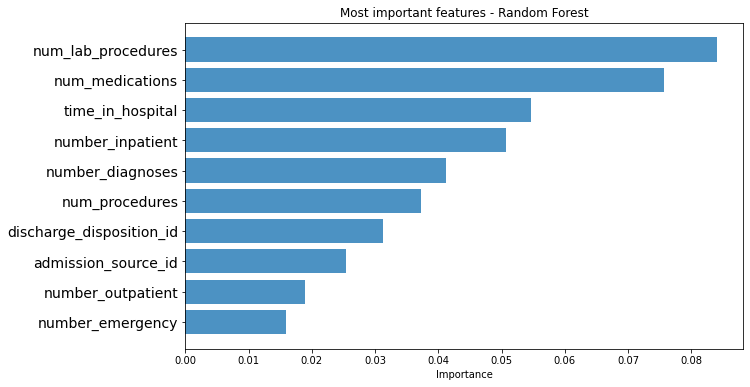

In [ ]:

#Determining which features are most important,
feature_names = Xtrain.columns
feature_imports = random_forest.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest')
plt.show()

# Decision Trees

In [ ]:
import numpy as np
import pandas as pd
# from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [ ]:
clfgini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clfgini.fit(Xtrain, Ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [ ]:

ypreddt = clfgini.predict(Xtest)
ypreddt

array([1, 1, 0, ..., 1, 0, 1])

In [ ]:
print( "Accuracy is ", accuracy_score(Ytest,ypreddt)*100)

Accuracy is  62.358447833308176


In [ ]:
import graphviz
from IPython.display import Image
import pydotplus

In [ ]:
dot_dt_q2 = tree.export_graphviz(clfgini, out_file="dt_q2.dot", feature_names=Xtrain.columns, max_depth=3, class_names=["1","0"], filled=True, rounded=True, special_characters=True)
graph_dt_q2 = pydotplus.graph_from_dot_file('dt_q2.dot')

In [ ]:
# import os
# os.environ["PATH"] += os.pathsep + 'C:\\NITEEN\\Data Science\\library\\graphviz-2.38\\release\\bin'

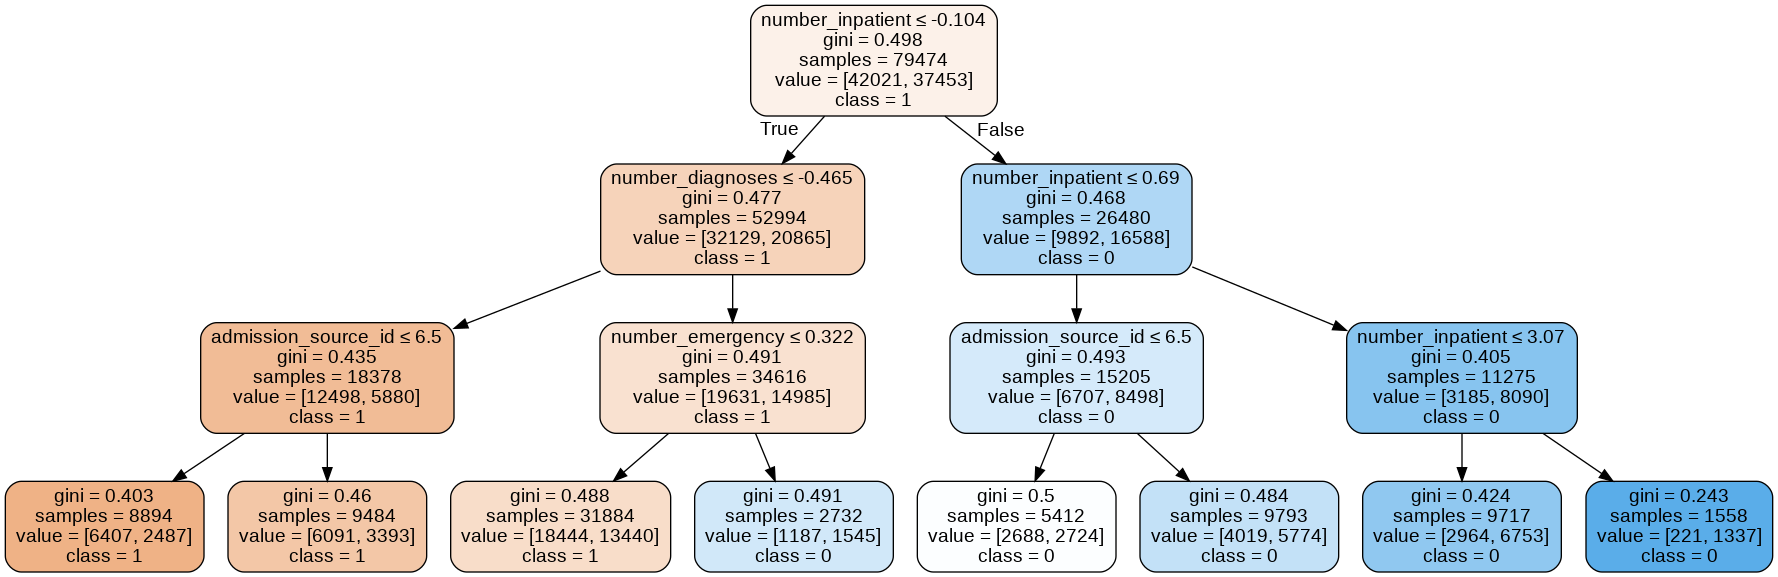

In [ ]:
Image(graph_dt_q2.create_png())

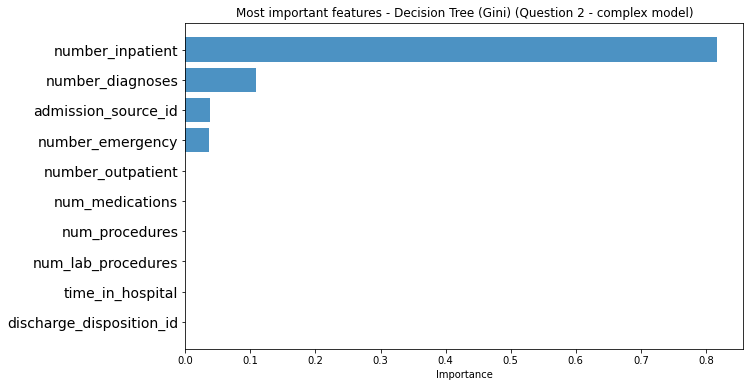

In [ ]:
# Shot top most features based on importance
feature_names = Xtrain.columns
feature_imports = clfgini.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree (Gini) (Question 2 - complex model)')
plt.show()

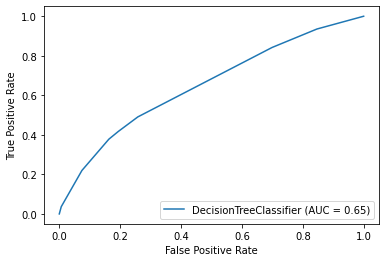

In [ ]:
metrics.plot_roc_curve(clfgini, Xtest, Ytest)

# Model Evaluation and Model Selection

In [ ]:
fpr_log, tpr_log, thresholds = roc_curve(Ytest, YScre)#logistic regression
fpr_rf, tpr_rf, thresholds = roc_curve(Ytest, Yrandforest)#random forest classifier

In [ ]:
fpr_dt, tpr_dt, thresholds = roc_curve(Ytest,ypreddt )  # decision tree

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


Text(0, 0.5, 'True Positive Rate')

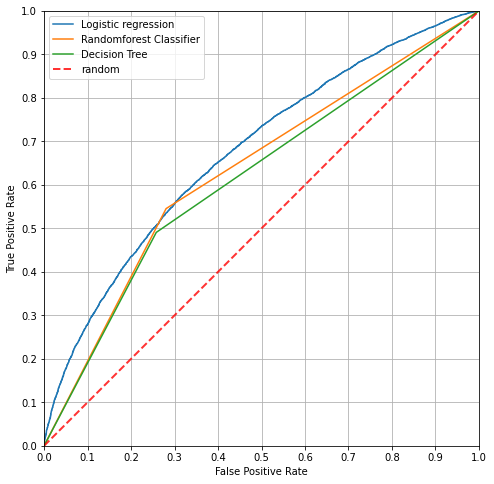

In [ ]:
# compare the ROC curve between different models
plt.figure(figsize=(8,8))
plt.plot(fpr_log, tpr_log, label='Logistic regression')
# plt.plot(fpr_adaclf, tpr_adaclf, label='Adaboost Classifier')
plt.plot(fpr_rf, tpr_rf, label='Randomforest Classifier')
# plt.plot(fpr_adamod, tpr_adamod, label='Adaboost with the best Pars')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='random', alpha=.8)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,1.1,0.1))
plt.grid()
plt.legend()
plt.axes().set_aspect('equal')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [ ]:
print("Accuracy of Logistic regression model:" ,logisticreg.score(Xtest, Ytest)*100)
print("Accuracy of Random forest classification: ", random_forest.score(Xtest, Ytest)*100)
print( "Accuracy of Decision Tree ", accuracy_score(Ytest,ypreddt)*100)

Accuracy of Logistic regression model: 62.76611807338064
Accuracy of Random forest classification:  63.74251346318386
Accuracy of Decision Tree  62.358447833308176


# Your final observations....

According to the current U.S. Census Caucasian makes up 57.8% of the population white Hispanic and African Americans make up 18.7% and 12.1% of the population respectively. In this study, Caucasian make up 76.2% of patients with diabetes who were readmitted, while African Americans make up 17.8% of the of readmitted patients and Hispanics only make up 1.8% of readmitted patients in this study.

In this study Caucasians and African Americans are overrepresented and Hispanics are underrepresented compared to the general population measure by 2020 census. This study identifies that Caucasians are in greater danger of readmission followed by African Americans, and Hispanic respectively. 

This data set is missing information that makes it difficult to ascertain the rationale why each group is in danger of being readmitted to a hospital. Information on each patient weigh is missing along with data on each patient’s A1C results along with a complete lack of information on the lifestyle of each patient. These factors are important because they are comorbidities that can be analyzed to find rationale for the number of readmissions. 


However, there factors that are in this study that have abundance of data that may explain the reason for the readmission of patients in general. Age appears to be a good indicator to predict if a patient will be readmitted. It appears the probability of patient being readmitted to a hospital because of diabetes or complication from diabetes goes up with age. The age group with the highest readmission rate is the 70-80 age group with roughly 12 thousand patients being readmitted while the age group with the lowest rate is the 0-10 age group. The second age groups with the next highest rates are the 80-90 group and the 50-60 group. 

The American health care system has a reputation of having racial inequality when it comes to the quantity and quality of medical care for racial minorities. However, looking at the time of hospitalization, medical laboratory procedures, medical procedures, and the number of medications issued to each patient based on race and ethnicity their difference in the quantity of care is not evident. There is virtually no difference between the number of procedures that a White patient has compared to a Hispanic or Black patient. You can conclude that in this study as far the data is concern there was no difference in care along racial lines